In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import OLSInfluence
import os
import pickle

In [2]:
uncleaned_wetchem_df = pd.read_csv("outputFiles/joined_spectra_with_lims.csv")
uncleaned_wetchem_df = uncleaned_wetchem_df.rename(columns={"Unnamed: 0":"sample_code"})
uncleaned_wetchem_df.set_index("sample_code")

,aluminium,boron,calcium,clay,copper,ec_salts,exchangeable_acidity,iron,magnesium,manganese,phosphorus,potassium,sand,silt,sodium,sulphur,zinc,ph
sample_code,,,,,,,,,,,,,,,,,,
CA001SA0036,NaN,1.09,520.0,NaN,139,113.0,NaN,146.0,65.5,92.6,414,379,NaN,NaN,8.85,34.8,4.78,4.14
CA002SA0573,NaN,0.77,2790.0,NaN,3.12,72.7,NaN,242.0,516.0,302.0,63.1,571,NaN,NaN,135,22.7,2.91,6.47
CA002SA0600,NaN,2.03,3470.0,NaN,2.82,872.0,NaN,164.0,749.0,426.0,179,1010,NaN,NaN,296,83.9,5.08,6.93
CA002SA0613,NaN,3.10,6250.0,NaN,4.84,273.0,NaN,111.0,546.0,268.0,292,1020,NaN,NaN,151,50.1,3.96,7.25
CA002SA0618,NaN,1.70,3390.0,NaN,1.52,154.0,NaN,177.0,419.0,171.0,61.1,572,NaN,NaN,218,15.9,1.45,6.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FA907-203SA0005,NaN,0.46,1380.0,NaN,2.07,70.8,NaN,160.0,307.0,286.0,25.4,530,NaN,NaN,18.6,13.8,3.61,5.89
FA907-217SA0001,NaN,NaN,1490.0,NaN,NaN,NaN,NaN,NaN,251.0,NaN,14.6,811,NaN,NaN,28.5,NaN,NaN,5.63
FA907-220SA0001,NaN,0.49,1840.0,NaN,2.90,51.5,NaN,175.0,241.0,154.0,14.5,420,NaN,NaN,23.7,11.2,5.75,5.90


In [3]:
for column in uncleaned_wetchem_df.columns:
    if(column != 'sample_code'):
        vals = []
        for value in uncleaned_wetchem_df[column].values:
            if(value is not None):
                value = str(value)
                value = value.replace(">","").replace("<","").replace("...","").strip()
                value = float(value)
            vals.append(value)
        uncleaned_wetchem_df[column] = vals

In [4]:
wetchem_df = uncleaned_wetchem_df.copy(deep=True)
wetchem_df.set_index("sample_code")

,aluminium,boron,calcium,clay,copper,ec_salts,exchangeable_acidity,iron,magnesium,manganese,phosphorus,potassium,sand,silt,sodium,sulphur,zinc,ph
sample_code,,,,,,,,,,,,,,,,,,
CA001SA0036,NaN,1.09,520.0,NaN,139.00,113.0,NaN,146.0,65.5,92.6,414.00,379.0,NaN,NaN,8.85,34.8,4.78,4.14
CA002SA0573,NaN,0.77,2790.0,NaN,3.12,72.7,NaN,242.0,516.0,302.0,63.10,571.0,NaN,NaN,135.00,22.7,2.91,6.47
CA002SA0600,NaN,2.03,3470.0,NaN,2.82,872.0,NaN,164.0,749.0,426.0,179.00,1010.0,NaN,NaN,296.00,83.9,5.08,6.93
CA002SA0613,NaN,3.10,6250.0,NaN,4.84,273.0,NaN,111.0,546.0,268.0,292.00,1020.0,NaN,NaN,151.00,50.1,3.96,7.25
CA002SA0618,NaN,1.70,3390.0,NaN,1.52,154.0,NaN,177.0,419.0,171.0,61.10,572.0,NaN,NaN,218.00,15.9,1.45,6.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FA907-203SA0005,NaN,0.46,1380.0,NaN,2.07,70.8,NaN,160.0,307.0,286.0,25.40,530.0,NaN,NaN,18.60,13.8,3.61,5.89
FA907-217SA0001,NaN,NaN,1490.0,NaN,NaN,NaN,NaN,NaN,251.0,NaN,14.60,811.0,NaN,NaN,28.50,NaN,NaN,5.63
FA907-220SA0001,NaN,0.49,1840.0,NaN,2.90,51.5,NaN,175.0,241.0,154.0,14.50,420.0,NaN,NaN,23.70,11.2,5.75,5.90


In [5]:
uncleaned_wetchem_df.describe()

,aluminium,boron,calcium,clay,copper,ec_salts,exchangeable_acidity,iron,magnesium,manganese,phosphorus,potassium,sand,silt,sodium,sulphur,zinc,ph
count,840.000000,4257.000000,4777.000000,551.000000,4257.000000,4020.000000,534.000000,4204.000000,4777.000000,4257.000000,4491.000000,4777.000000,518.000000,518.000000,4770.000000,4260.000000,4257.000000,4757.000000
mean,906.057024,0.784177,1901.695336,29.113648,5.790084,178.170402,0.371884,155.281946,319.544369,147.249723,67.605077,512.634846,54.445193,16.092683,80.846369,32.177722,8.153252,6.069950
std,451.515071,0.981537,1788.810634,18.661254,19.622621,592.081203,0.730578,86.337295,304.781860,110.938567,128.980174,657.493975,21.738216,10.649208,282.094297,61.301979,18.738223,0.919295
min,147.000000,0.020000,0.830000,1.860000,0.200000,0.048000,0.046000,5.000000,3.380000,0.880000,0.200000,0.200000,9.010000,0.100000,0.600000,0.500000,0.200000,3.240000
25%,522.750000,0.260000,656.000000,13.100000,1.010000,49.000000,0.100000,95.075000,114.000000,59.200000,6.040000,126.000000,36.300000,7.710000,10.900000,10.200000,1.660000,5.460000
50%,885.500000,0.550000,1410.000000,26.700000,1.920000,89.250000,0.150000,136.000000,240.000000,123.000000,17.800000,325.000000,55.550000,13.600000,24.400000,17.300000,3.560000,6.040000
75%,1190.000000,0.970000,2560.000000,41.050000,3.730000,176.000000,0.257500,194.000000,426.000000,210.000000,66.700000,738.000000,73.000000,24.000000,63.975000,32.300000,8.480000,6.620000
max,2560.000000,23.100000,20300.000000,82.700000,340.000000,33600.000000,6.250000,1080.000000,3120.000000,1140.000000,1630.000000,27000.000000,96.000000,50.600000,8170.000000,1160.000000,477.000000,10.400000


In [6]:
wetchem_df = uncleaned_wetchem_df.copy(deep=True)
wetchem_df.set_index("sample_code")

,aluminium,boron,calcium,clay,copper,ec_salts,exchangeable_acidity,iron,magnesium,manganese,phosphorus,potassium,sand,silt,sodium,sulphur,zinc,ph
sample_code,,,,,,,,,,,,,,,,,,
CA001SA0036,NaN,1.09,520.0,NaN,139.00,113.0,NaN,146.0,65.5,92.6,414.00,379.0,NaN,NaN,8.85,34.8,4.78,4.14
CA002SA0573,NaN,0.77,2790.0,NaN,3.12,72.7,NaN,242.0,516.0,302.0,63.10,571.0,NaN,NaN,135.00,22.7,2.91,6.47
CA002SA0600,NaN,2.03,3470.0,NaN,2.82,872.0,NaN,164.0,749.0,426.0,179.00,1010.0,NaN,NaN,296.00,83.9,5.08,6.93
CA002SA0613,NaN,3.10,6250.0,NaN,4.84,273.0,NaN,111.0,546.0,268.0,292.00,1020.0,NaN,NaN,151.00,50.1,3.96,7.25
CA002SA0618,NaN,1.70,3390.0,NaN,1.52,154.0,NaN,177.0,419.0,171.0,61.10,572.0,NaN,NaN,218.00,15.9,1.45,6.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FA907-203SA0005,NaN,0.46,1380.0,NaN,2.07,70.8,NaN,160.0,307.0,286.0,25.40,530.0,NaN,NaN,18.60,13.8,3.61,5.89
FA907-217SA0001,NaN,NaN,1490.0,NaN,NaN,NaN,NaN,NaN,251.0,NaN,14.60,811.0,NaN,NaN,28.50,NaN,NaN,5.63
FA907-220SA0001,NaN,0.49,1840.0,NaN,2.90,51.5,NaN,175.0,241.0,154.0,14.50,420.0,NaN,NaN,23.70,11.2,5.75,5.90


In [7]:
len(wetchem_df.index.unique())

4947

In [8]:
wetchem_df

,sample_code,aluminium,boron,calcium,clay,copper,ec_salts,exchangeable_acidity,iron,magnesium,manganese,phosphorus,potassium,sand,silt,sodium,sulphur,zinc,ph
0,CA001SA0036,NaN,1.09,520.0,NaN,139.00,113.0,NaN,146.0,65.5,92.6,414.00,379.0,NaN,NaN,8.85,34.8,4.78,4.14
1,CA002SA0573,NaN,0.77,2790.0,NaN,3.12,72.7,NaN,242.0,516.0,302.0,63.10,571.0,NaN,NaN,135.00,22.7,2.91,6.47
2,CA002SA0600,NaN,2.03,3470.0,NaN,2.82,872.0,NaN,164.0,749.0,426.0,179.00,1010.0,NaN,NaN,296.00,83.9,5.08,6.93
3,CA002SA0613,NaN,3.10,6250.0,NaN,4.84,273.0,NaN,111.0,546.0,268.0,292.00,1020.0,NaN,NaN,151.00,50.1,3.96,7.25
4,CA002SA0618,NaN,1.70,3390.0,NaN,1.52,154.0,NaN,177.0,419.0,171.0,61.10,572.0,NaN,NaN,218.00,15.9,1.45,6.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4942,FA907-203SA0005,NaN,0.46,1380.0,NaN,2.07,70.8,NaN,160.0,307.0,286.0,25.40,530.0,NaN,NaN,18.60,13.8,3.61,5.89
4943,FA907-217SA0001,NaN,NaN,1490.0,NaN,NaN,NaN,NaN,NaN,251.0,NaN,14.60,811.0,NaN,NaN,28.50,NaN,NaN,5.63
4944,FA907-220SA0001,NaN,0.49,1840.0,NaN,2.90,51.5,NaN,175.0,241.0,154.0,14.50,420.0,NaN,NaN,23.70,11.2,5.75,5.90
4945,FA907-222SA0001,NaN,0.89,1910.0,NaN,1.29,137.0,NaN,102.0,440.0,180.0,2.56,928.0,NaN,NaN,220.00,17.7,1.22,6.64


In [9]:
# wetchem_df['exchangeable_acidity'].describe()

count    534.000000
mean       0.371884
std        0.730578
min        0.046000
25%        0.100000
50%        0.150000
75%        0.257500
max        6.250000
Name: exchangeable_acidity, dtype: float64

In [10]:
def cooks_distance_outliers(column): 
    x = wetchem_df.dropna(subset=[column])[column].values
    samples = wetchem_df.dropna(subset=[column])["sample_code"].values
#     x.sort()
    y = []
    count = 0
    for i in x:
        y.append(count)
        count+=1
    f = 'x ~ y'
    df = pd.DataFrame({"x":x, "y":y, "sample_code": samples})
    model = ols(formula=f, data=df).fit()

    cook_distance = OLSInfluence(model).cooks_distance
    (distance, p_value) = cook_distance
    df['distance'] = distance
    mean_cooks_dist = df["distance"].mean()
    
    
    outliers = df.loc[df["distance"] > 3*(mean_cooks_dist)]
    outliers = outliers.rename(columns={"x": column})
    outliers.drop('y', axis=1,inplace=True)
    outliers.drop('distance', axis=1,inplace=True)
    
    df_ = df.loc[df["distance"] <= 3*(mean_cooks_dist)]
    df_ = df_.rename(columns={"x": column})
    
    df.drop('y', axis=1,inplace=True)
    df.drop('distance', axis=1,inplace=True)
    
    if(column == 'exchangeable_acidity' or column == 'clay'):
        _ = pd.DataFrame()
        _[column] = []
        
        ex = wetchem_df.dropna(subset=[column])
        ex = ex[[column,'sample_code']]
        ex= ex.reset_index()
        print(ex.columns)
#         print(ex['exchangeable_acidity'].describe())
        return ex, _
    
    
    vals = list(df_[column].values)

    df_[column] = vals
                
    
    return df_, outliers

In [11]:
df_no_outliers = pd.DataFrame()
df_cooks_outliers = pd.DataFrame()

In [12]:
# cooks_distance_outliers("aluminium")

In [13]:
# wetchem_df['exchangeable_acidity'].describe()

count    534.000000
mean       0.371884
std        0.730578
min        0.046000
25%        0.100000
50%        0.150000
75%        0.257500
max        6.250000
Name: exchangeable_acidity, dtype: float64

In [14]:
for col in wetchem_df.columns:
    if(col != 'sample_code'):
        print(col)
        no_cooks_outliers, cooks_outliers = cooks_distance_outliers(col)
        if(col=='exchangeable_acidity'):
            print(no_cooks_outliers[col].describe())
        df_no_outliers = pd.concat([df_no_outliers,no_cooks_outliers[['sample_code', col]]], axis=0)
        df_cooks_outliers = pd.concat([df_cooks_outliers,cooks_outliers], axis=0)


aluminium
boron
calcium
clay
Index(['index', 'clay', 'sample_code'], dtype='object')
copper
ec_salts
exchangeable_acidity
Index(['index', 'exchangeable_acidity', 'sample_code'], dtype='object')
count    534.000000
mean       0.371884
std        0.730578
min        0.046000
25%        0.100000
50%        0.150000
75%        0.257500
max        6.250000
Name: exchangeable_acidity, dtype: float64
iron
magnesium
manganese
phosphorus
potassium
sand
silt
sodium
sulphur
zinc
ph


In [15]:
df_no_outliers = df_no_outliers.groupby("sample_code", sort=True).max()
df_cooks_outliers = df_cooks_outliers.groupby("sample_code", sort=True).max()

In [16]:
# df_no_outliers['exchangeable_acidity'].describe()

count    534.000000
mean       0.371884
std        0.730578
min        0.046000
25%        0.100000
50%        0.150000
75%        0.257500
max        6.250000
Name: exchangeable_acidity, dtype: float64

In [17]:
# df_cooks_outliers.exchangeable_acidity.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: exchangeable_acidity, dtype: float64

In [18]:
df_no_outliers.replace(0.0, np.nan, inplace=True)
df_cooks_outliers.replace(0.0, np.nan, inplace=True)

In [19]:
df_cooks_outliers

,aluminium,boron,calcium,clay,copper,ec_salts,exchangeable_acidity,iron,magnesium,manganese,phosphorus,potassium,sand,silt,sodium,sulphur,zinc,ph
sample_code,,,,,,,,,,,,,,,,,,
CA001SA0036,NaN,NaN,NaN,NaN,139.0,NaN,NaN,NaN,NaN,NaN,414.0,NaN,NaN,NaN,NaN,NaN,NaN,4.14
CA002SA0573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,242.0,NaN,302.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CA002SA0600,NaN,2.03,NaN,NaN,NaN,872.0,NaN,NaN,749.0,426.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CA002SA0613,NaN,3.10,6250.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,292.0,NaN,NaN,NaN,NaN,NaN,NaN,7.25
CA002SA0620,NaN,NaN,4070.0,NaN,NaN,916.0,NaN,NaN,716.0,338.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FA807-765SA0005,NaN,NaN,5940.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FA807-765SA0006,NaN,NaN,5090.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FA807-766SA0001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.6,NaN


In [20]:
len(df_no_outliers.index)

4865

In [21]:
len(df_cooks_outliers.index)

1578

In [22]:
122009 + 21258

143267

In [23]:

len(wetchem_df['sample_code'].unique())

4947

In [24]:
df_cooks_outliers

,aluminium,boron,calcium,clay,copper,ec_salts,exchangeable_acidity,iron,magnesium,manganese,phosphorus,potassium,sand,silt,sodium,sulphur,zinc,ph
sample_code,,,,,,,,,,,,,,,,,,
CA001SA0036,NaN,NaN,NaN,NaN,139.0,NaN,NaN,NaN,NaN,NaN,414.0,NaN,NaN,NaN,NaN,NaN,NaN,4.14
CA002SA0573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,242.0,NaN,302.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CA002SA0600,NaN,2.03,NaN,NaN,NaN,872.0,NaN,NaN,749.0,426.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CA002SA0613,NaN,3.10,6250.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,292.0,NaN,NaN,NaN,NaN,NaN,NaN,7.25
CA002SA0620,NaN,NaN,4070.0,NaN,NaN,916.0,NaN,NaN,716.0,338.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FA807-765SA0005,NaN,NaN,5940.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FA807-765SA0006,NaN,NaN,5090.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FA807-766SA0001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.6,NaN


In [25]:
df_cooks_outliers.to_csv("outputFiles/outliers_cooks_distance.csv")
df_no_outliers.to_csv("outputFiles/cleaned_data_cooks_distance.csv")

In [26]:
cooks_df_filtered = df_no_outliers

In [27]:
wetchem_df = df_no_outliers

In [28]:
wetchem_df

,aluminium,boron,calcium,clay,copper,ec_salts,exchangeable_acidity,iron,magnesium,manganese,phosphorus,potassium,sand,silt,sodium,sulphur,zinc,ph
sample_code,,,,,,,,,,,,,,,,,,
CA001SA0036,NaN,1.09,520.0,NaN,NaN,113.0,NaN,146.0,65.5,92.6,NaN,379.0,NaN,NaN,8.85,34.8,4.78,NaN
CA002SA0573,NaN,0.77,2790.0,NaN,3.12,72.7,NaN,NaN,516.0,NaN,63.10,571.0,NaN,NaN,135.00,22.7,2.91,6.47
CA002SA0600,NaN,NaN,3470.0,NaN,2.82,NaN,NaN,164.0,NaN,NaN,179.00,1010.0,NaN,NaN,296.00,83.9,5.08,6.93
CA002SA0613,NaN,NaN,NaN,NaN,4.84,273.0,NaN,111.0,546.0,268.0,NaN,1020.0,NaN,NaN,151.00,50.1,3.96,NaN
CA002SA0618,NaN,1.70,3390.0,NaN,1.52,154.0,NaN,177.0,419.0,171.0,61.10,572.0,NaN,NaN,218.00,15.9,1.45,6.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FA907-203SA0005,NaN,0.46,1380.0,NaN,2.07,70.8,NaN,160.0,307.0,286.0,25.40,530.0,NaN,NaN,18.60,13.8,3.61,5.89
FA907-217SA0001,NaN,NaN,1490.0,NaN,NaN,NaN,NaN,NaN,251.0,NaN,14.60,811.0,NaN,NaN,28.50,NaN,NaN,5.63
FA907-220SA0001,NaN,0.49,1840.0,NaN,2.90,51.5,NaN,175.0,241.0,154.0,14.50,420.0,NaN,NaN,23.70,11.2,5.75,5.90


In [29]:
high_value_filter_df = pd.DataFrame()
low_value_filter_df = pd.DataFrame()

In [30]:
all_chemicals = ['psi', 'aluminium', 
            'phosphorus', 'ph', 'exchangeable_acidity', 'calcium', 'magnesium',
              'sulphur', 'sodium', 'iron', 'manganese', 'boron', 'copper', 'zinc', 'total_nitrogen', 'potassium',
             'ec_salts', 'organic_carbon', 'cec', 'sand', 'silt', 'clay']

In [31]:
element_deviations = pickle.load(open('inputFiles/element_deviation_thresholds.pkl', 'rb'))


In [32]:
element_deviations

{'organic_carbon': {'lower_quartile_deviation': 0.07181925000000033,
  'mean_deviation': 0.15572999999999992,
  'upper_quartile_deviation': 0.3041775000000002},
 'total_nitrogen': {'lower_quartile_deviation': 0.004324379999999989,
  'mean_deviation': 0.011582999999999982,
  'upper_quartile_deviation': 0.024183494999999944},
 'aluminium': {'lower_quartile_deviation': 60.0,
  'mean_deviation': 110.0,
  'upper_quartile_deviation': 190.0},
 'boron': {'lower_quartile_deviation': 3.5,
  'mean_deviation': 7.8999999999999915,
  'upper_quartile_deviation': 16.6},
 'calcium': {'lower_quartile_deviation': 150.0,
  'mean_deviation': 360.0,
  'upper_quartile_deviation': 660.0},
 'copper': {'lower_quartile_deviation': 3.8999999999999986,
  'mean_deviation': 11.5,
  'upper_quartile_deviation': 25.099999999999994},
 'ec_salts': {'lower_quartile_deviation': 109.0,
  'mean_deviation': 266.0,
  'upper_quartile_deviation': 627.25},
 'exchangeable_acidity': {'lower_quartile_deviation': 0.2974999999999999,


In [33]:
def get_outliers(chemical):
    upper = wetchem_df[chemical].quantile(0.95)
    lower = wetchem_df[chemical].quantile(0.05)
    
    wetchem_data_copy = wetchem_df.copy()
    wetchem_data_copy.dropna(inplace=True, subset=[column])
    
    upper_outliers = wetchem_df[wetchem_df[chemical] > upper]
    lower_outliers = wetchem_df[wetchem_df[chemical] < lower]
    no_outliers = wetchem_df[(wetchem_df[chemical] >= lower) & (wetchem_df[chemical] <= upper)]
    
    return lower_outliers, no_outliers, upper_outliers

In [34]:
def get_gaps(outliers):
    gaps = []
    
    for i in range(len(outliers)-2):
        if(outliers[i+1] - outliers[i] > 0):
            gaps.append(outliers[i+1] - outliers[i])
    lower_quartile_gap = np.quantile(gaps,0.25)
    median_gap = np.quantile(gaps,0.50)
    upper_quartile_gap = np.quantile(gaps,0.75)
#     element_deviations[column]["lower_quartile_deviation"] = lower_quartile_gap
#     element_deviations[column]["mean_deviation"] = median_gap
#     element_deviations[column]["upper_quartile_deviation"] = upper_quartile_gap
    
    return lower_quartile_gap, median_gap, upper_quartile_gap

In [35]:
def _filter(outliers, gap_size, chemical):
    print(chemical)
    print(len(outliers))
    if(len(outliers) == 0):
        return wetchem_df[chemical]

    values = np.sort(outliers[chemical].values)
    maximum_val = max(values)
    if(chemical == 'clay' or chemical == 'exchangeable_acidity'):
        for i in range(len(values))[::-1]:
            
            if((values[i] - values[i-1]) >= 0.1*(values[i-1])):
                print("This is the gap allowed", 0.1*(values[i-1]))
                print("This is the gap",(values[i] - values[i-1]))
                maximum_val = values[(i-1)]
                break
            else:
                continue
    else:   
        for i in range(len(values))[::-1]:
            
            if((values[i] - values[i-1]) >= gap_size):
                print("This is the gap allowed", gap_size)
                print("This is the break gap",(values[i] - values[i-1]))
                maximum_val = values[(i-1)]
                break
            else:
                continue
    return wetchem_df.loc[wetchem_df[chemical] < maximum_val], wetchem_df.loc[wetchem_df[chemical] >= maximum_val]

<AxesSubplot:xlabel='magnesium'>

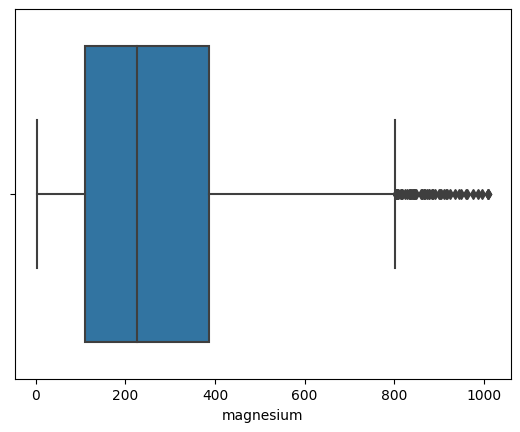

In [36]:
sns.boxplot(x=wetchem_df["magnesium"])

In [37]:
high_val_filtered_df = pd.DataFrame()
high_val_outliers_df = pd.DataFrame()

low_val_filtered_df = pd.DataFrame()
low_val_outliers_df = pd.DataFrame()

md_val_filtered_df = pd.DataFrame()
md_val_outliers_df = pd.DataFrame()

In [38]:
for column in wetchem_df.columns:
    if(column != "sample_code" and (column in all_chemicals)):
        lower_outliers, no_outliers, upper_outliers = get_outliers(column)
        lv_filtered , lv_outliers = _filter(upper_outliers,element_deviations[column]["lower_quartile_deviation"], column)
        mid_filtered, mid_outliers = _filter(upper_outliers,element_deviations[column]["mean_deviation"],column)
        hv_filtered, hv_outliers = _filter(upper_outliers,element_deviations[column]["upper_quartile_deviation"],column)

        high_val_filtered_df = pd.concat([high_val_filtered_df,hv_filtered], axis=0)
        high_val_outliers_df = pd.concat([high_val_outliers_df, hv_outliers], axis=0)

        low_val_filtered_df = pd.concat([low_val_filtered_df, lv_filtered], axis=0)
        low_val_outliers_df = pd.concat([low_val_outliers_df, lv_outliers], axis=0)

        md_val_filtered_df = pd.concat([md_val_filtered_df, mid_filtered], axis=0)
        md_val_outliers_df = pd.concat([md_val_outliers_df, mid_outliers], axis=0)  
        
    

aluminium
39
aluminium
39
aluminium
39
boron
204
boron
204
boron
204
calcium
226
This is the gap allowed 150.0
This is the break gap 220.0
calcium
226
calcium
226
clay
27
clay
27
clay
27
copper
207
copper
207
copper
207
ec_salts
198
This is the gap allowed 109.0
This is the break gap 120.0
ec_salts
198
ec_salts
198
exchangeable_acidity
23
This is the gap allowed 0.555
This is the gap 0.7000000000000002
exchangeable_acidity
23
This is the gap allowed 0.555
This is the gap 0.7000000000000002
exchangeable_acidity
23
This is the gap allowed 0.555
This is the gap 0.7000000000000002
iron
198
iron
198
iron
198
magnesium
226
magnesium
226
magnesium
226
manganese
195
manganese
195
manganese
195
phosphorus
211
phosphorus
211
phosphorus
211
potassium
222
potassium
222
potassium
222
sand
24
This is the gap allowed 0.7178564287142564
This is the break gap 0.8999999999999915
sand
24
sand
24
silt
23
This is the gap allowed 0.44571762071762233
This is the break gap 2.6000000000000014
silt
23
This is t

In [39]:
high_val_filtered_df = high_val_filtered_df.reset_index() 
high_val_outliers_df = high_val_outliers_df.reset_index()

low_val_filtered_df = low_val_filtered_df.reset_index()
low_val_outliers_df = low_val_outliers_df.reset_index() 

md_val_filtered_df = md_val_filtered_df.reset_index()
md_val_outliers_df = md_val_outliers_df.reset_index()

In [40]:
high_val_filtered_df = high_val_filtered_df.groupby("sample_code", sort=True).max()
high_val_outliers_df = high_val_outliers_df.groupby("sample_code", sort=True).max()

low_val_filtered_df = low_val_filtered_df.groupby("sample_code", sort=True).max()
low_val_outliers_df = low_val_outliers_df.groupby("sample_code", sort=True).max()

md_val_filtered_df = md_val_filtered_df.groupby("sample_code", sort=True).max()
md_val_outliers_df = md_val_outliers_df.groupby("sample_code", sort=True).max()

In [41]:
high_val_filtered_df.replace(0,np.nan, inplace=True)
high_val_outliers_df.replace(0,np.nan, inplace=True)

low_val_filtered_df.replace(0,np.nan, inplace=True)
low_val_outliers_df.replace(0,np.nan, inplace=True)

md_val_filtered_df.replace(0,np.nan, inplace=True)
md_val_outliers_df.replace(0,np.nan, inplace=True)

In [42]:
high_val_filtered_df = high_val_filtered_df.apply(pd.to_numeric)
high_val_outliers_df = high_val_outliers_df.apply(pd.to_numeric)

low_val_filtered_df = low_val_filtered_df.apply(pd.to_numeric)
low_val_outliers_df = low_val_outliers_df.apply(pd.to_numeric)

md_val_filtered_df = md_val_filtered_df.apply(pd.to_numeric)
md_val_outliers_df = md_val_outliers_df.apply(pd.to_numeric)

In [43]:
high_val_filtered_df.to_csv("outputFiles/hv_filtered.csv")
high_val_outliers_df.to_csv("outputFiles/hv_outliers.csv")

low_val_filtered_df.to_csv("outputFiles/lv_filtered.csv")
low_val_outliers_df.to_csv("outputFiles/lv_outliers.csv")

md_val_filtered_df.to_csv("outputFiles/md_filtered.csv")
md_val_outliers_df.to_csv("outputFiles/md_outliers.csv")

In [44]:
pickle.dump(element_deviations, open("element_deviation_thresholds.pkl","wb"))

In [45]:
low_val_outliers_df

,aluminium,boron,calcium,clay,copper,ec_salts,exchangeable_acidity,iron,magnesium,manganese,phosphorus,potassium,sand,silt,sodium,sulphur,zinc,ph
sample_code,,,,,,,,,,,,,,,,,,
CB057SA0517,NaN,0.170,329.0,5.42,0.85,21.4,NaN,153.0,69.3,155.0,4.23,46.2,90.9,3.71,29.30,6.89,1.46,5.99
CB057SA0812,NaN,NaN,472.0,7.64,NaN,NaN,NaN,NaN,151.0,NaN,20.10,169.0,88.7,3.64,30.10,NaN,NaN,6.79
CC176SA0795,242.0,0.082,269.0,3.87,0.56,53.8,0.15,59.5,47.7,27.1,16.50,33.2,91.4,4.70,6.56,3.76,0.54,5.92
CC176SA0829,327.0,0.100,384.0,5.30,0.59,62.6,0.10,45.5,73.1,70.4,10.60,11.1,92.6,2.14,5.96,3.59,0.64,6.19
CC176SA0869,290.0,0.160,399.0,7.15,0.39,52.3,0.10,48.9,86.1,164.0,7.16,14.5,91.9,NaN,3.01,3.62,0.32,6.54
CC176SA1204,332.0,0.160,746.0,6.14,0.77,344.0,0.15,46.1,159.0,139.0,9.12,30.7,89.6,4.27,9.74,6.59,0.95,6.00
CC176SA1585,165.0,0.150,386.0,6.00,0.28,75.1,0.20,95.9,74.6,27.9,21.30,33.0,90.4,3.57,7.84,3.80,0.74,5.67
CC176SA1853,277.0,0.028,351.0,8.16,0.81,9.9,0.15,201.0,62.2,26.5,4.73,13.7,54.7,37.10,2.15,0.50,0.84,5.95
CC176SA1880,541.0,0.020,193.0,11.00,0.85,9.8,0.25,265.0,69.5,10.7,4.44,31.4,51.9,37.10,5.99,5.05,0.53,5.62


In [46]:
low_val_filtered_df

,aluminium,boron,calcium,clay,copper,ec_salts,exchangeable_acidity,iron,magnesium,manganese,phosphorus,potassium,sand,silt,sodium,sulphur,zinc,ph
sample_code,,,,,,,,,,,,,,,,,,
CA001SA0036,NaN,1.09,520.0,NaN,NaN,113.0,NaN,146.0,65.5,92.6,NaN,379.0,NaN,NaN,8.85,34.8,4.78,NaN
CA002SA0573,NaN,0.77,2790.0,NaN,3.12,72.7,NaN,NaN,516.0,NaN,63.10,571.0,NaN,NaN,135.00,22.7,2.91,6.47
CA002SA0600,NaN,NaN,3470.0,NaN,2.82,NaN,NaN,164.0,NaN,NaN,179.00,1010.0,NaN,NaN,296.00,83.9,5.08,6.93
CA002SA0613,NaN,NaN,NaN,NaN,4.84,273.0,NaN,111.0,546.0,268.0,NaN,1020.0,NaN,NaN,151.00,50.1,3.96,NaN
CA002SA0618,NaN,1.70,3390.0,NaN,1.52,154.0,NaN,177.0,419.0,171.0,61.10,572.0,NaN,NaN,218.00,15.9,1.45,6.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FA907-203SA0005,NaN,0.46,1380.0,NaN,2.07,70.8,NaN,160.0,307.0,286.0,25.40,530.0,NaN,NaN,18.60,13.8,3.61,5.89
FA907-217SA0001,NaN,NaN,1490.0,NaN,NaN,NaN,NaN,NaN,251.0,NaN,14.60,811.0,NaN,NaN,28.50,NaN,NaN,5.63
FA907-220SA0001,NaN,0.49,1840.0,NaN,2.90,51.5,NaN,175.0,241.0,154.0,14.50,420.0,NaN,NaN,23.70,11.2,5.75,5.90


Residual Outliers

In [47]:
outliers = {'boron' : [-5, 5], 'phosphorus' : [-250, 450],'zinc' : [-25, 100], 'sulphur' : [-100, 400],'sodium':[-1000,2500], 'magnesium':[-500,1000],'potassium' : [-800,1600],'calcium':[-5000,5000],'copper' : [-100,300],'ec_salts' : [-1000,2000],'organic_carbon' : [-2,2] }

In [48]:
pcc3_elements = ['cec', 'copper', 'iron', 'manganese', 'ph', 'total_nitrogen']

In [49]:
pcc_classes_dict = pd.read_csv("inputFiles/element_managemet_thresholds.csv").T.to_dict()

In [50]:
pcc_classes_dict[1].keys()

dict_keys(['soilProperty', 'Value_1', 'Value_2', 'Value_3'])

In [51]:
wetchem_df

,aluminium,boron,calcium,clay,copper,ec_salts,exchangeable_acidity,iron,magnesium,manganese,phosphorus,potassium,sand,silt,sodium,sulphur,zinc,ph
sample_code,,,,,,,,,,,,,,,,,,
CA001SA0036,NaN,1.09,520.0,NaN,NaN,113.0,NaN,146.0,65.5,92.6,NaN,379.0,NaN,NaN,8.85,34.8,4.78,NaN
CA002SA0573,NaN,0.77,2790.0,NaN,3.12,72.7,NaN,NaN,516.0,NaN,63.10,571.0,NaN,NaN,135.00,22.7,2.91,6.47
CA002SA0600,NaN,NaN,3470.0,NaN,2.82,NaN,NaN,164.0,NaN,NaN,179.00,1010.0,NaN,NaN,296.00,83.9,5.08,6.93
CA002SA0613,NaN,NaN,NaN,NaN,4.84,273.0,NaN,111.0,546.0,268.0,NaN,1020.0,NaN,NaN,151.00,50.1,3.96,NaN
CA002SA0618,NaN,1.70,3390.0,NaN,1.52,154.0,NaN,177.0,419.0,171.0,61.10,572.0,NaN,NaN,218.00,15.9,1.45,6.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FA907-203SA0005,NaN,0.46,1380.0,NaN,2.07,70.8,NaN,160.0,307.0,286.0,25.40,530.0,NaN,NaN,18.60,13.8,3.61,5.89
FA907-217SA0001,NaN,NaN,1490.0,NaN,NaN,NaN,NaN,NaN,251.0,NaN,14.60,811.0,NaN,NaN,28.50,NaN,NaN,5.63
FA907-220SA0001,NaN,0.49,1840.0,NaN,2.90,51.5,NaN,175.0,241.0,154.0,14.50,420.0,NaN,NaN,23.70,11.2,5.75,5.90


In [52]:
wetchem_df = wetchem_df.reset_index()

In [53]:
chemicals = ['psi', 'aluminium', 
            'phosphorus', 'ph', 'exchangeable_acidity', 'calcium', 'magnesium',
              'sulphur', 'sodium', 'iron', 'manganese', 'boron', 'copper', 'zinc', 'potassium',
             'ec_salts', 'cec', 'sand', 'silt', 'clay']

In [54]:
outlier_sample_codes = []

# for file in os.listdir("../QC_Model Preds_2022-11-06/preds"):
# if(".csv" in file):
# chem = file.split('.')[0]
for chem in chemicals:
    df = pd.read_csv("outputFiles/predictions.csv")
    print(df)
    if('sample_code' not in df.columns):
        df = df.rename(columns={'Unnamed: 0':'sample_code'})
    if(chem in outliers.keys() and chem in df.columns):
        outliers_df = df.loc[(df[chem] <= outliers[chem][0]) | (df[chem] >= outliers[chem][1])]
        outlier_sample_codes.append(outliers_df['sample_code'].values)
    elif(chem in pcc3_elements and chem in wetchem_df.columns):

        chem_df = wetchem_df[['sample_code',chem]].drop_duplicates(subset = "sample_code")

        df = df.drop_duplicates(subset = "sample_code")
        joined_df = pd.merge(chem_df, df, how='inner', on=['sample_code'])
        joined_df.dropna(inplace=True)
        print(chem)
        lower = None
        mid = None
        upper = None
        for i in pcc_classes_dict.keys():
            if(chem in pcc_classes_dict[i]['soilProperty']):
                lower = pcc_classes_dict[i]['Value_1']
                mid = pcc_classes_dict[i]['Value_2']
                upper = pcc_classes_dict[i]['Value_3']

                break
        if(chem in joined_df.columns):
            joined_df.loc[joined_df[chem] >= upper, "actual_class"] = 4
            joined_df.loc[joined_df['0'] >= upper, "predicted_class"] = 4

            joined_df.loc[(joined_df[chem] >= mid) & (joined_df[chem] < upper), "actual_class"] = 3
            joined_df.loc[(joined_df['0'] >= mid) & (joined_df['0'] < upper), "predicted_class"] = 3

            joined_df.loc[(joined_df[chem] >= lower) & (joined_df[chem] < mid), "actual_class"] = 2
            joined_df.loc[(joined_df['0'] >= lower) & (joined_df['0'] < mid), "predicted_class"] = 2

            joined_df.loc[joined_df[chem] < lower, "actual_class"] = 1
            joined_df.loc[joined_df['0'] < lower, "predicted_class"] = 1

        #             joined_df.to_csv(f"../QC_Model Preds_2022-11-06/preds/{file}")
            joined_df = joined_df.loc[(joined_df['actual_class'] - joined_df['predicted_class']) > 2]
            outlier_sample_codes.append(joined_df['sample_code'].values)
    else:
        print(chem)

            
            
        

     sample_code    aluminium     boron      calcium        cec       clay  \
0    CA053SA1351   855.216675  0.486857  1984.256470  18.271006  33.876694   
1    CA602SA0019  1111.785522  1.010853  2965.624023  24.196814  33.082703   
2    CA602SA0021  1082.780640  0.937555  3861.044922  31.078741  33.702190   
3    CA602SA0022   978.424744  1.448676  4050.130859  31.604263  31.714094   
4    CA602SA0023   986.171387  1.914882  4672.532227  28.644297  33.505245   
..           ...          ...       ...          ...        ...        ...   
533     ISE958-1          NaN       NaN          NaN        NaN        NaN   
534     ISE958-2          NaN       NaN          NaN        NaN        NaN   
535    ML-SS21-1          NaN       NaN          NaN        NaN        NaN   
536    ML-SS21-2          NaN       NaN          NaN        NaN        NaN   
537    ML-SS21-8          NaN       NaN          NaN        NaN        NaN   

       copper  exchangeable_acidity        iron   magnesium  ..

In [55]:
codes = []
for arr in outlier_sample_codes:
    for code in arr:
        codes.append(code)

In [56]:
len((codes))

65

In [57]:
codes = np.unique(codes)

In [58]:
df = wetchem_df

In [59]:
no_residual_outliers = wetchem_df[~(wetchem_df['sample_code'].isin(codes))]

In [60]:
no_residual_outliers

,sample_code,aluminium,boron,calcium,clay,copper,ec_salts,exchangeable_acidity,iron,magnesium,manganese,phosphorus,potassium,sand,silt,sodium,sulphur,zinc,ph
0,CA001SA0036,NaN,1.09,520.0,NaN,NaN,113.0,NaN,146.0,65.5,92.6,NaN,379.0,NaN,NaN,8.85,34.8,4.78,NaN
1,CA002SA0573,NaN,0.77,2790.0,NaN,3.12,72.7,NaN,NaN,516.0,NaN,63.10,571.0,NaN,NaN,135.00,22.7,2.91,6.47
2,CA002SA0600,NaN,NaN,3470.0,NaN,2.82,NaN,NaN,164.0,NaN,NaN,179.00,1010.0,NaN,NaN,296.00,83.9,5.08,6.93
3,CA002SA0613,NaN,NaN,NaN,NaN,4.84,273.0,NaN,111.0,546.0,268.0,NaN,1020.0,NaN,NaN,151.00,50.1,3.96,NaN
4,CA002SA0618,NaN,1.70,3390.0,NaN,1.52,154.0,NaN,177.0,419.0,171.0,61.10,572.0,NaN,NaN,218.00,15.9,1.45,6.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4860,FA907-203SA0005,NaN,0.46,1380.0,NaN,2.07,70.8,NaN,160.0,307.0,286.0,25.40,530.0,NaN,NaN,18.60,13.8,3.61,5.89
4861,FA907-217SA0001,NaN,NaN,1490.0,NaN,NaN,NaN,NaN,NaN,251.0,NaN,14.60,811.0,NaN,NaN,28.50,NaN,NaN,5.63
4862,FA907-220SA0001,NaN,0.49,1840.0,NaN,2.90,51.5,NaN,175.0,241.0,154.0,14.50,420.0,NaN,NaN,23.70,11.2,5.75,5.90
4863,FA907-222SA0001,NaN,0.89,1910.0,NaN,1.29,137.0,NaN,102.0,440.0,180.0,2.56,928.0,NaN,NaN,220.00,17.7,1.22,6.64


In [61]:
no_residual_outliers.set_index("sample_code")

,aluminium,boron,calcium,clay,copper,ec_salts,exchangeable_acidity,iron,magnesium,manganese,phosphorus,potassium,sand,silt,sodium,sulphur,zinc,ph
sample_code,,,,,,,,,,,,,,,,,,
CA001SA0036,NaN,1.09,520.0,NaN,NaN,113.0,NaN,146.0,65.5,92.6,NaN,379.0,NaN,NaN,8.85,34.8,4.78,NaN
CA002SA0573,NaN,0.77,2790.0,NaN,3.12,72.7,NaN,NaN,516.0,NaN,63.10,571.0,NaN,NaN,135.00,22.7,2.91,6.47
CA002SA0600,NaN,NaN,3470.0,NaN,2.82,NaN,NaN,164.0,NaN,NaN,179.00,1010.0,NaN,NaN,296.00,83.9,5.08,6.93
CA002SA0613,NaN,NaN,NaN,NaN,4.84,273.0,NaN,111.0,546.0,268.0,NaN,1020.0,NaN,NaN,151.00,50.1,3.96,NaN
CA002SA0618,NaN,1.70,3390.0,NaN,1.52,154.0,NaN,177.0,419.0,171.0,61.10,572.0,NaN,NaN,218.00,15.9,1.45,6.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FA907-203SA0005,NaN,0.46,1380.0,NaN,2.07,70.8,NaN,160.0,307.0,286.0,25.40,530.0,NaN,NaN,18.60,13.8,3.61,5.89
FA907-217SA0001,NaN,NaN,1490.0,NaN,NaN,NaN,NaN,NaN,251.0,NaN,14.60,811.0,NaN,NaN,28.50,NaN,NaN,5.63
FA907-220SA0001,NaN,0.49,1840.0,NaN,2.90,51.5,NaN,175.0,241.0,154.0,14.50,420.0,NaN,NaN,23.70,11.2,5.75,5.90


In [62]:
no_residual_outliers.loc[no_residual_outliers['sample_code'] == "AGD510-234SA0001"]

,sample_code,aluminium,boron,calcium,clay,copper,ec_salts,exchangeable_acidity,iron,magnesium,manganese,phosphorus,potassium,sand,silt,sodium,sulphur,zinc,ph


In [63]:
no_residual_outliers.to_csv("outputFiles/no_residual_outliers.csv")

In [64]:
codes

array(['CA602SA0021', 'CA602SA0022', 'CA602SA0023', 'CA602SA0024',
       'CA602SA0025', 'CA602SA0026', 'CA602SA0028', 'CA602SA0031',
       'CA602SA0035', 'CF246SA0021', 'CF246SA0034', 'CF246SA0040',
       'CF246SA0046', 'CF246SA0047', 'CF246SA0051', 'CF246SA0052',
       'CF246SA0054', 'CF246SA0065', 'CF246SA0066', 'CF246SA0068',
       'CF246SA0069', 'CF246SA0070', 'CF246SA0071', 'CF246SA0072',
       'CF246SA0073', 'CF246SA0074', 'CF246SA0078', 'CF256SA0047',
       'CF256SA0049', 'CF256SA0056', 'CH186SA0001', 'CH186SA0002',
       'CI014SA7027', 'CI014SA7032', 'CI014SA7038', 'CI014SA7039',
       'CI014SA7041', 'CI014SA7048', 'CI014SA7061', 'CI014SA7069',
       'CI014SA7073', 'CI014SA7078', 'CI014SA7079', 'CI014SA7082',
       'CI014SA7090', 'CI014SA7195', 'CI014SA7244', 'CS006SA0042',
       'FA611-430SA0001', 'FA807-765SA0005'], dtype='<U15')

In [65]:
wetchem_df = wetchem_df.reset_index()

In [66]:
residual_outliers = wetchem_df[~(wetchem_df['sample_code'].isin(no_residual_outliers.sample_code.values))]

In [67]:
residual_outliers = residual_outliers.set_index("sample_code")
no_residual_outliers = no_residual_outliers.set_index("sample_code")

In [68]:
residual_outliers = residual_outliers.apply(pd.to_numeric)
no_residual_outliers = no_residual_outliers.apply(pd.to_numeric)

In [69]:
residual_outliers.to_csv("outputFiles/residual_outliers_filtered_out.csv")
residual_outliers


,index,aluminium,boron,calcium,clay,copper,ec_salts,exchangeable_acidity,iron,magnesium,manganese,phosphorus,potassium,sand,silt,sodium,sulphur,zinc,ph
sample_code,,,,,,,,,,,,,,,,,,,
CF246SA0021,1768,NaN,1.28,5730.0,NaN,1.56,NaN,NaN,140.0,884.0,171.0,30.70,843.0,NaN,NaN,70.4,NaN,0.93,7.44
CF246SA0034,1780,NaN,0.94,5230.0,NaN,1.18,NaN,NaN,116.0,NaN,231.0,61.40,993.0,NaN,NaN,39.2,NaN,1.63,6.81
CF246SA0046,1782,NaN,1.32,NaN,NaN,3.39,NaN,NaN,88.6,NaN,195.0,36.40,1800.0,NaN,NaN,137.0,NaN,2.63,7.34
CF246SA0047,1783,NaN,1.02,NaN,NaN,3.57,NaN,NaN,77.9,NaN,142.0,16.10,1390.0,NaN,NaN,42.2,NaN,1.39,7.74
CF246SA0051,1787,NaN,0.97,4500.0,NaN,1.76,NaN,NaN,140.0,NaN,162.0,116.00,1240.0,NaN,NaN,29.2,NaN,3.50,7.02
CF246SA0052,1788,NaN,0.79,5080.0,NaN,1.78,NaN,NaN,132.0,NaN,161.0,83.50,475.0,NaN,NaN,42.0,NaN,3.04,7.26
CF246SA0054,1790,NaN,0.86,NaN,NaN,1.51,NaN,NaN,135.0,NaN,131.0,86.00,547.0,NaN,NaN,117.0,NaN,1.25,7.13
CF246SA0065,1801,NaN,0.56,4040.0,NaN,1.20,NaN,NaN,189.0,NaN,96.8,78.10,683.0,NaN,NaN,58.3,NaN,2.59,6.35
CF246SA0066,1802,NaN,0.55,5190.0,NaN,1.54,NaN,NaN,138.0,NaN,172.0,14.80,513.0,NaN,NaN,93.7,NaN,1.69,6.40


In [70]:
no_residual_outliers.to_csv("outputFiles/residual_outliers.csv")
no_residual_outliers

,aluminium,boron,calcium,clay,copper,ec_salts,exchangeable_acidity,iron,magnesium,manganese,phosphorus,potassium,sand,silt,sodium,sulphur,zinc,ph
sample_code,,,,,,,,,,,,,,,,,,
CA001SA0036,NaN,1.09,520.0,NaN,NaN,113.0,NaN,146.0,65.5,92.6,NaN,379.0,NaN,NaN,8.85,34.8,4.78,NaN
CA002SA0573,NaN,0.77,2790.0,NaN,3.12,72.7,NaN,NaN,516.0,NaN,63.10,571.0,NaN,NaN,135.00,22.7,2.91,6.47
CA002SA0600,NaN,NaN,3470.0,NaN,2.82,NaN,NaN,164.0,NaN,NaN,179.00,1010.0,NaN,NaN,296.00,83.9,5.08,6.93
CA002SA0613,NaN,NaN,NaN,NaN,4.84,273.0,NaN,111.0,546.0,268.0,NaN,1020.0,NaN,NaN,151.00,50.1,3.96,NaN
CA002SA0618,NaN,1.70,3390.0,NaN,1.52,154.0,NaN,177.0,419.0,171.0,61.10,572.0,NaN,NaN,218.00,15.9,1.45,6.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FA907-203SA0005,NaN,0.46,1380.0,NaN,2.07,70.8,NaN,160.0,307.0,286.0,25.40,530.0,NaN,NaN,18.60,13.8,3.61,5.89
FA907-217SA0001,NaN,NaN,1490.0,NaN,NaN,NaN,NaN,NaN,251.0,NaN,14.60,811.0,NaN,NaN,28.50,NaN,NaN,5.63
FA907-220SA0001,NaN,0.49,1840.0,NaN,2.90,51.5,NaN,175.0,241.0,154.0,14.50,420.0,NaN,NaN,23.70,11.2,5.75,5.90


In [71]:
residual_outliers.describe()

,index,aluminium,boron,calcium,clay,copper,ec_salts,exchangeable_acidity,iron,magnesium,manganese,phosphorus,potassium,sand,silt,sodium,sulphur,zinc,ph
count,25.000000,0.0,22.000000,14.000000,4.000000,25.000000,8.000000,0.0,25.000000,8.000000,25.00000,18.000000,24.000000,4.000000,4.000000,24.000000,8.000000,24.000000,22.000000
mean,2149.520000,NaN,1.056818,4655.714286,56.950000,2.613200,213.300000,NaN,118.612000,712.375000,173.68400,46.005000,751.750000,25.125000,17.925000,137.037500,47.525000,3.570833,7.015455
std,897.396007,NaN,0.429799,741.492407,11.147945,3.763245,130.778679,NaN,42.061595,192.764058,58.48263,41.312293,412.564962,10.200776,4.926375,144.611521,37.196572,6.290217,0.487918
min,1768.000000,NaN,0.550000,2940.000000,41.400000,0.360000,88.400000,NaN,22.600000,324.000000,62.30000,3.000000,134.000000,16.400000,11.900000,18.100000,20.300000,0.700000,6.230000
25%,1790.000000,NaN,0.685000,4172.500000,53.400000,1.390000,153.000000,NaN,88.600000,614.750000,136.00000,10.885000,473.250000,16.625000,14.900000,45.800000,24.350000,1.525000,6.685000
50%,1807.000000,NaN,0.955000,4670.000000,59.500000,1.660000,157.000000,NaN,120.000000,765.500000,171.00000,30.100000,684.000000,23.700000,18.900000,101.850000,31.700000,2.025000,6.920000
75%,1824.000000,NaN,1.310000,5220.000000,63.050000,2.630000,216.250000,NaN,140.000000,847.250000,195.00000,82.150000,880.500000,32.200000,21.925000,145.250000,50.725000,3.135000,7.320000
max,4850.000000,NaN,2.010000,5730.000000,67.400000,20.200000,465.000000,NaN,204.000000,904.000000,310.00000,120.000000,1800.000000,36.700000,22.000000,682.000000,124.000000,32.400000,8.010000


In [72]:
no_residual_outliers.describe()

,aluminium,boron,calcium,clay,copper,ec_salts,exchangeable_acidity,iron,magnesium,manganese,phosphorus,potassium,sand,silt,sodium,sulphur,zinc,ph
count,769.000000,4087.000000,4505.000000,547.000000,4116.000000,3965.000000,534.000000,3936.000000,4510.000000,3920.000000,4239.000000,4550.000000,487.000000,476.00000,4644.000000,4148.000000,4141.000000,4322.000000
mean,865.872562,0.661023,1604.055188,28.910091,3.156282,150.167621,0.371884,144.212246,267.652871,127.762276,44.231968,436.491134,54.247023,14.88958,52.814444,24.841585,6.401568,5.997193
std,401.709834,0.546793,1197.733835,18.557819,4.630722,176.380785,0.730578,65.653089,192.819184,86.560472,65.433660,388.778870,21.184396,9.18415,80.441643,23.750841,7.597788,0.753576
min,147.000000,0.020000,0.830000,1.860000,0.200000,0.048000,0.046000,5.000000,3.380000,1.300000,0.200000,0.200000,10.000000,0.10000,0.600000,0.500000,0.200000,3.860000
25%,507.000000,0.250000,624.000000,13.100000,0.990000,48.500000,0.100000,94.000000,110.000000,54.975000,5.655000,121.000000,37.850000,7.67500,10.500000,10.000000,1.630000,5.480000
50%,878.000000,0.520000,1330.000000,26.400000,1.860000,87.700000,0.150000,132.500000,224.000000,113.000000,15.600000,301.000000,55.400000,12.15000,23.600000,16.900000,3.490000,6.000000
75%,1150.000000,0.910000,2310.000000,40.700000,3.500000,171.000000,0.257500,183.000000,385.000000,187.000000,53.450000,670.750000,71.500000,23.00000,59.500000,30.400000,7.950000,6.510000
max,1800.000000,3.140000,6270.000000,82.700000,48.700000,1510.000000,6.250000,356.000000,1010.000000,415.000000,363.000000,1960.000000,92.600000,39.70000,677.000000,161.000000,52.500000,8.260000


In [ ]:
import os
try:
    os.mkdir("outputFiles/boxplots")
except:
    print()

psi
aluminium
aluminium
147.0
2560.0
phosphorus
phosphorus
0.2
1630.0
ph
ph
3.24
10.4
exchangeable_acidity
exchangeable_acidity
0.046
6.25
calcium
calcium
0.83
20300.0
magnesium
magnesium
3.38
3120.0
sulphur
sulphur
0.5
1160.0
sodium
sodium
0.6
8170.0
iron
iron
5.0
1080.0
manganese
manganese
0.88
1140.0
boron
boron
0.02
23.1
copper
copper
0.2
340.0
zinc
zinc
0.2
477.0
potassium
potassium
0.2
27000.0
ec_salts
ec_salts
0.048
33600.0
cec
sand
sand
9.01
96.0
silt
silt
0.1
50.6
clay
clay
1.86
82.7


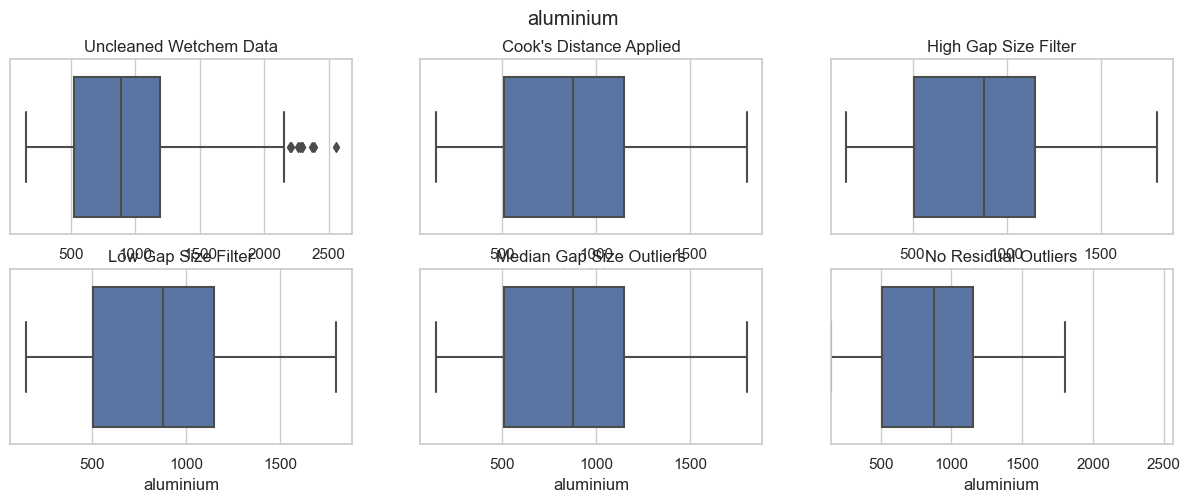

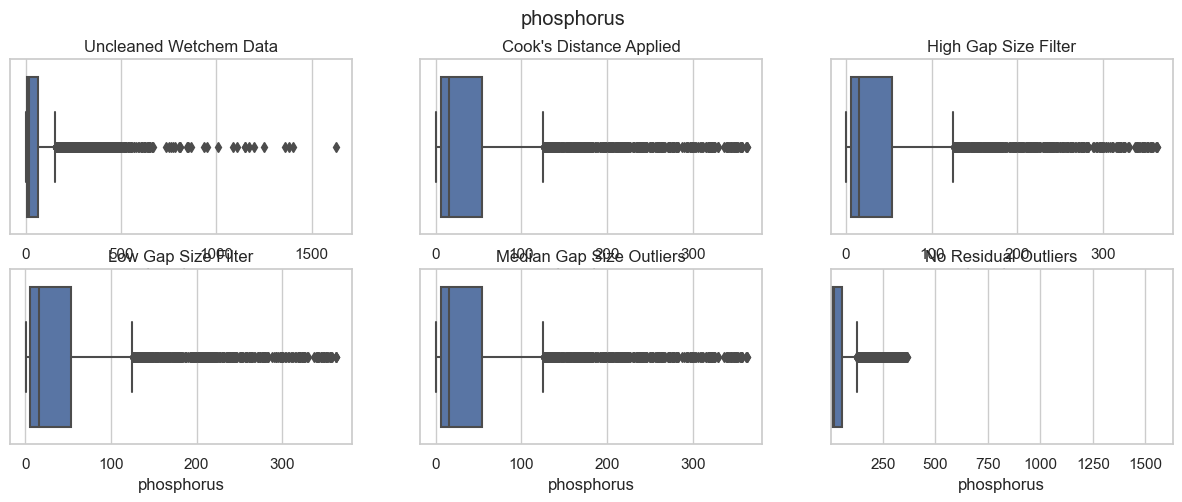

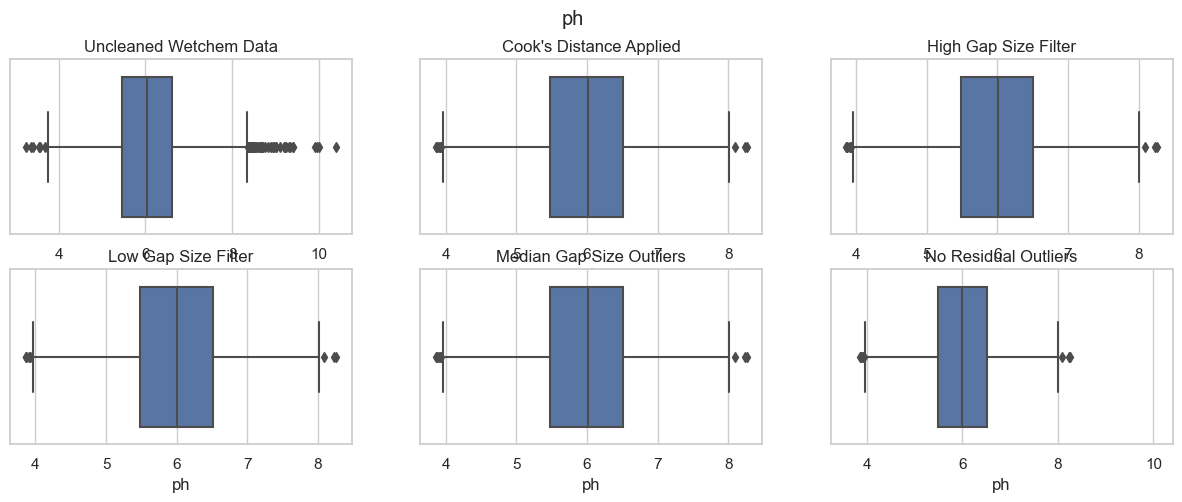

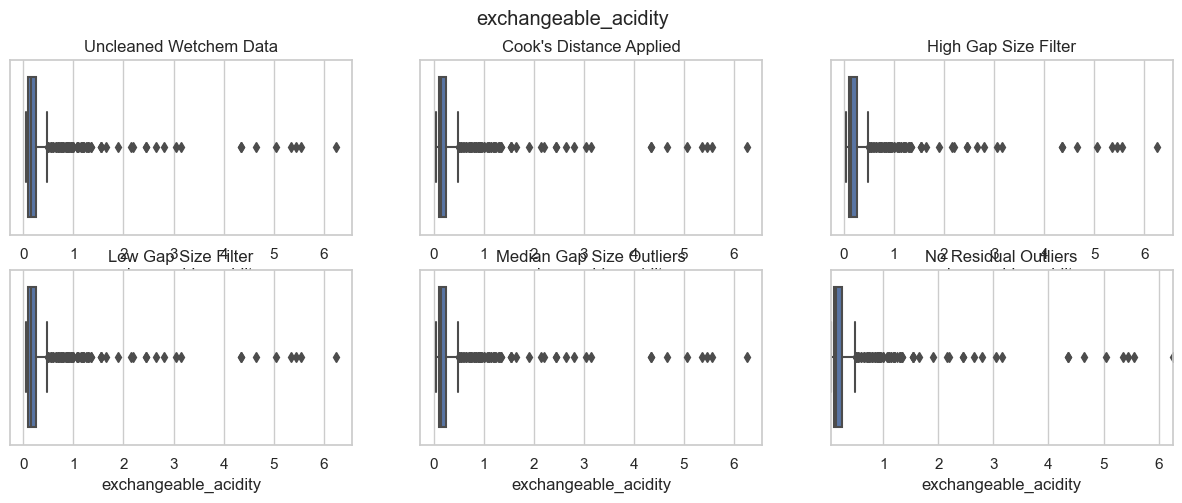

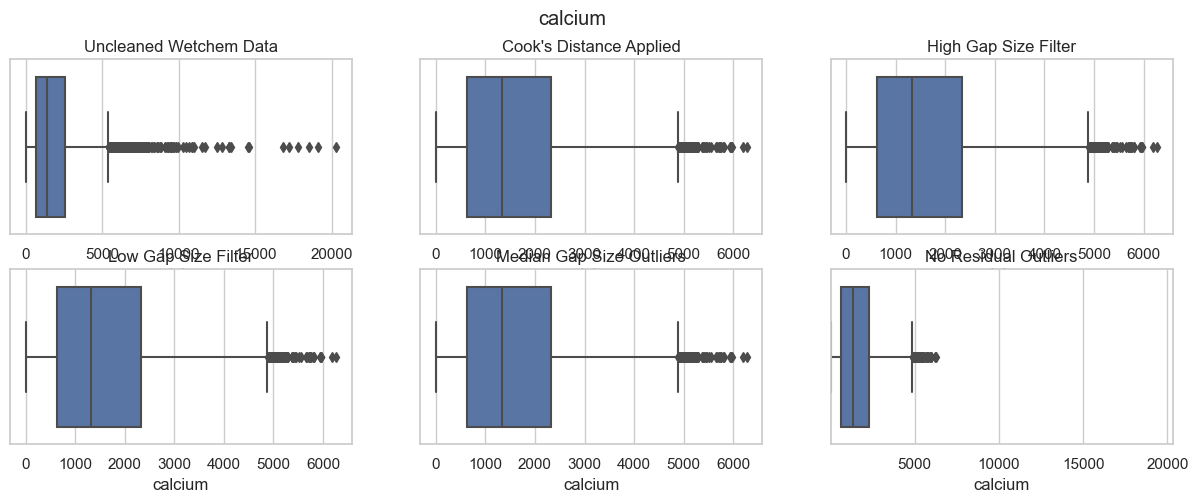

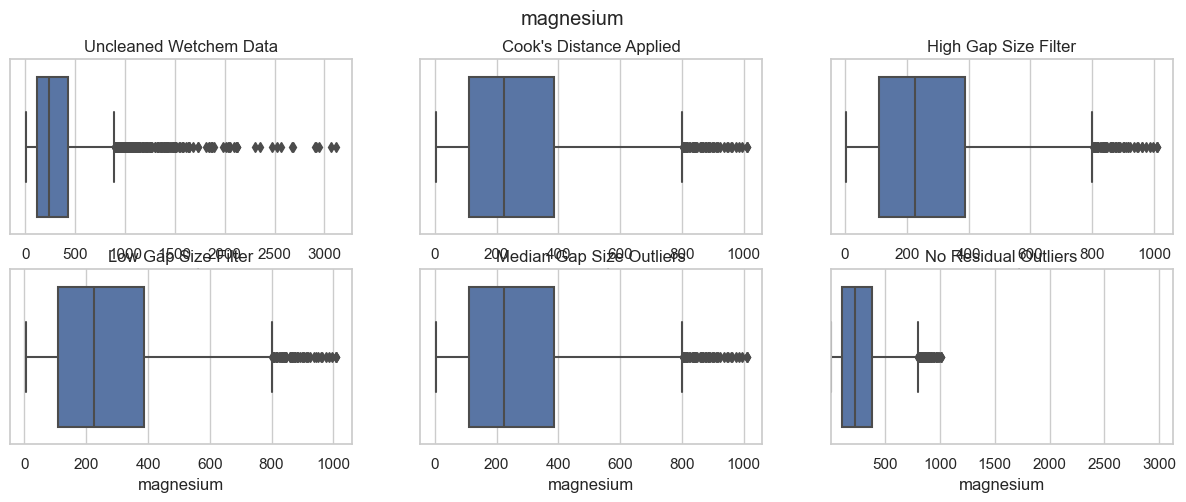

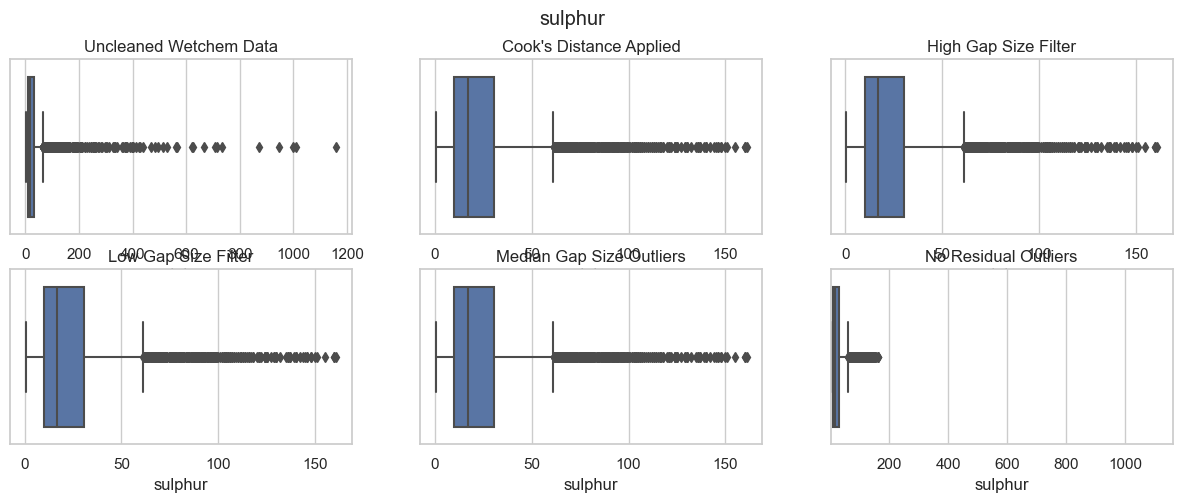

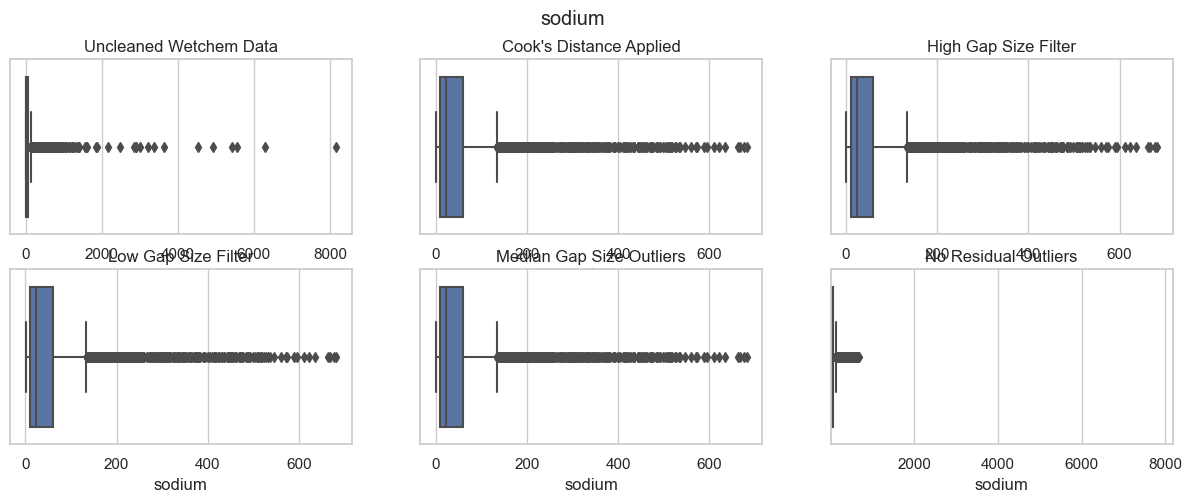

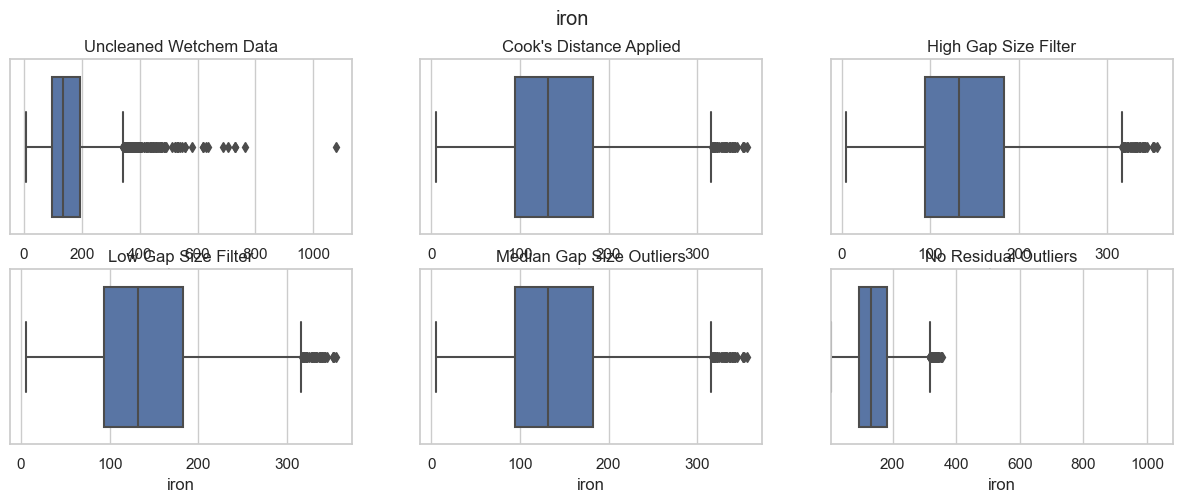

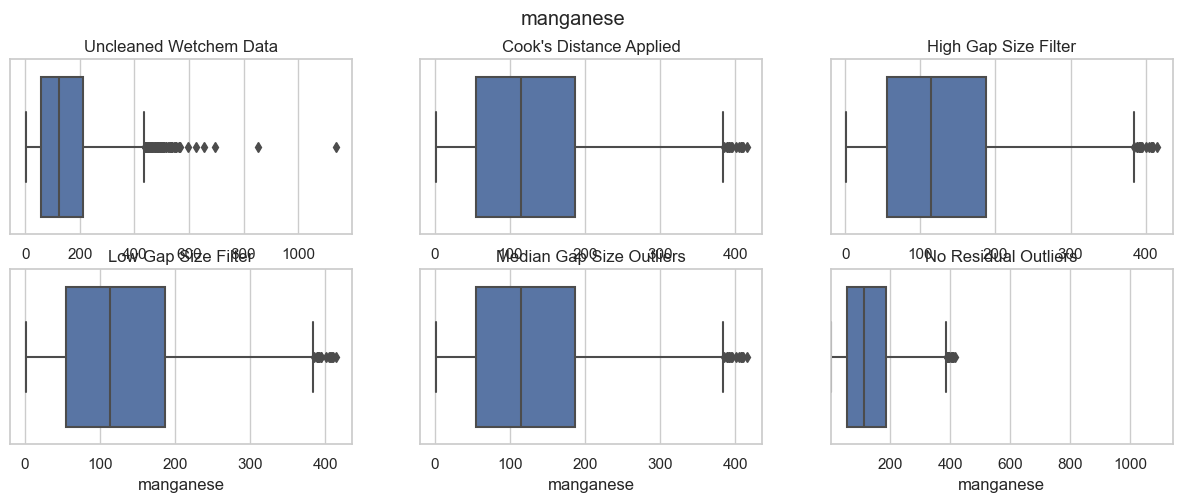

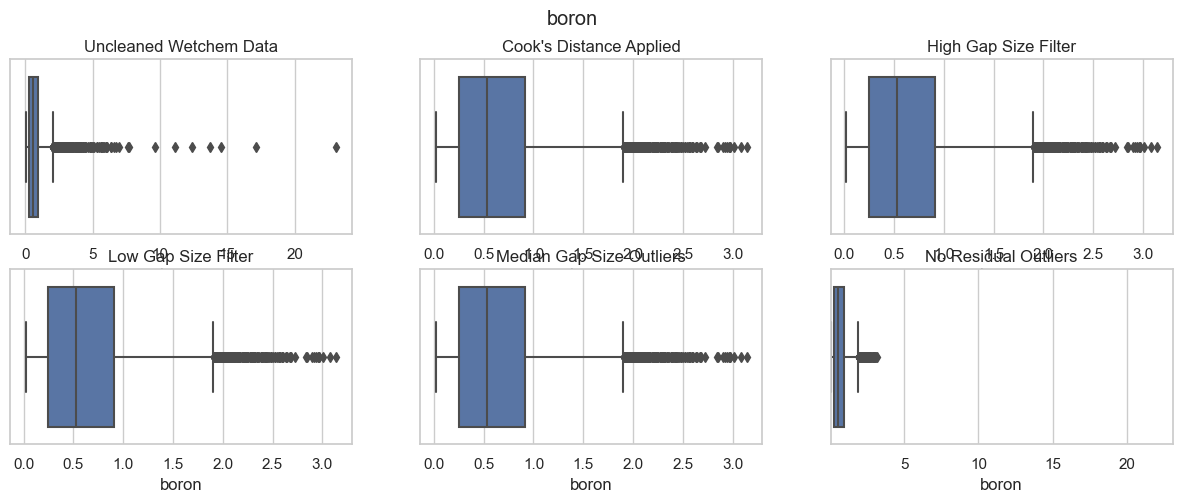

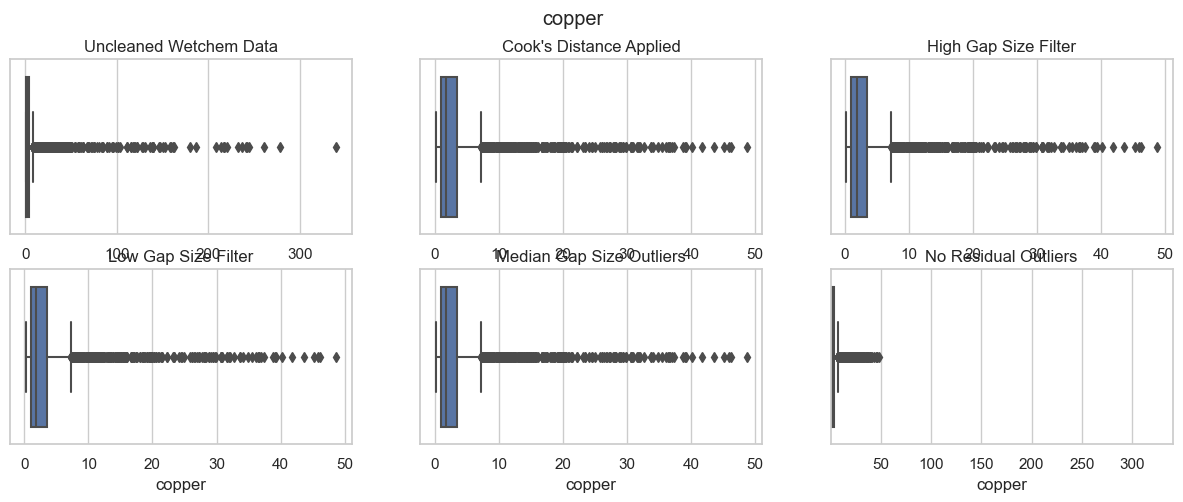

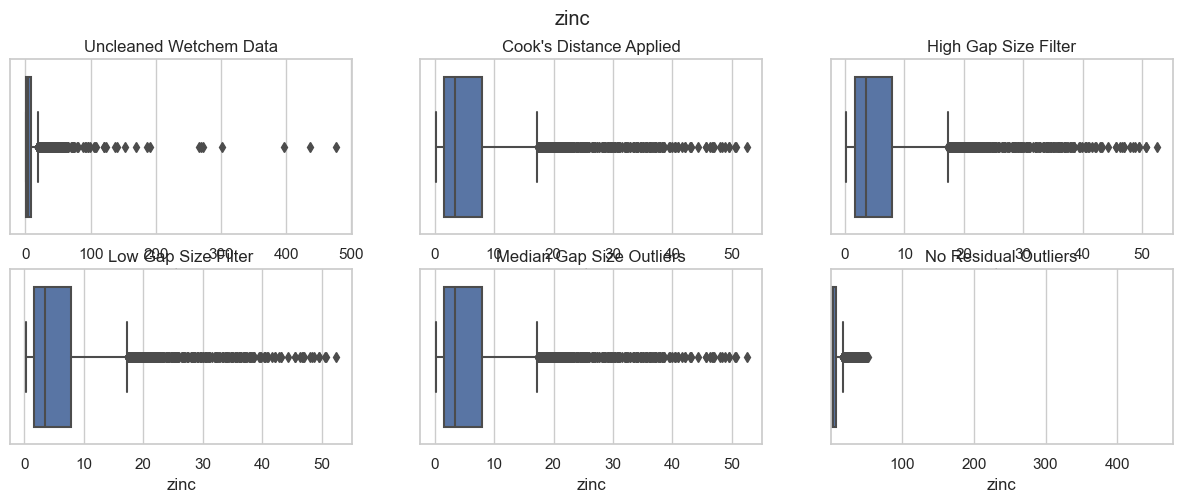

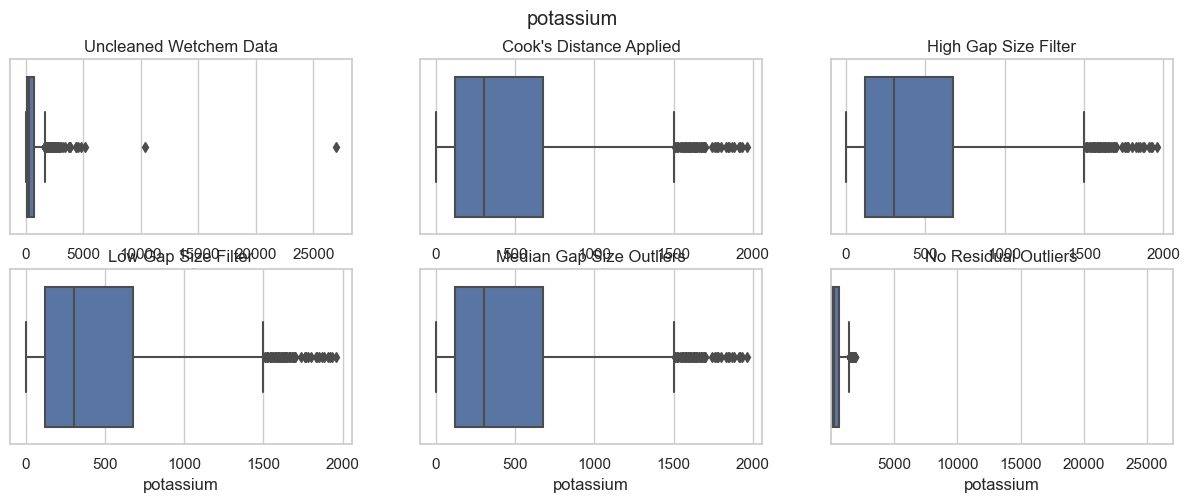

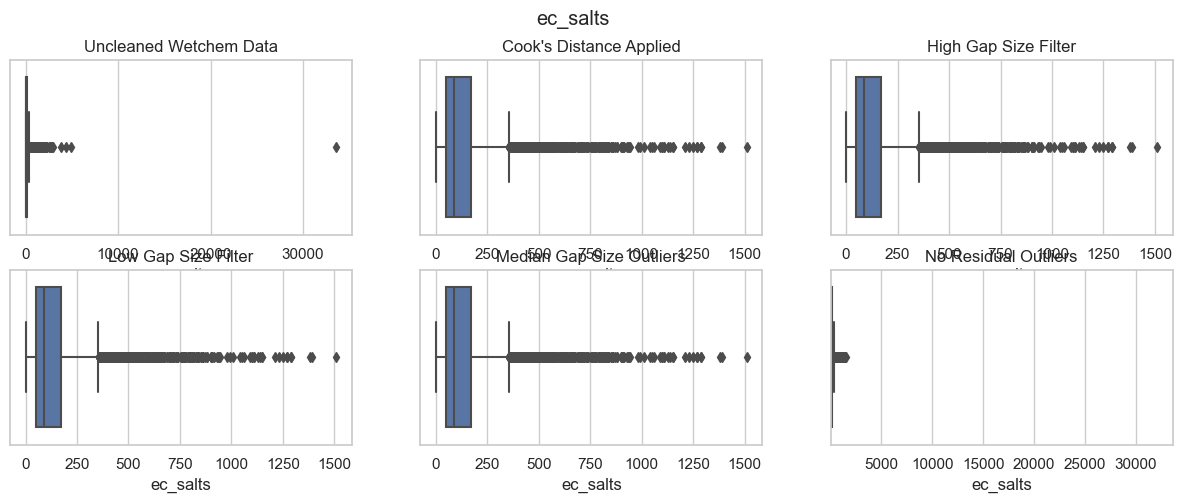

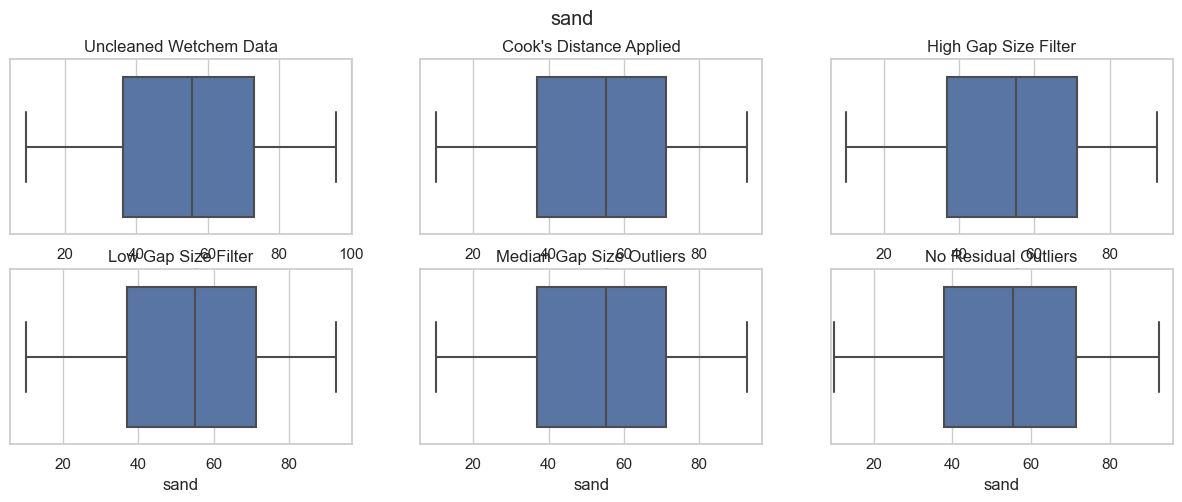

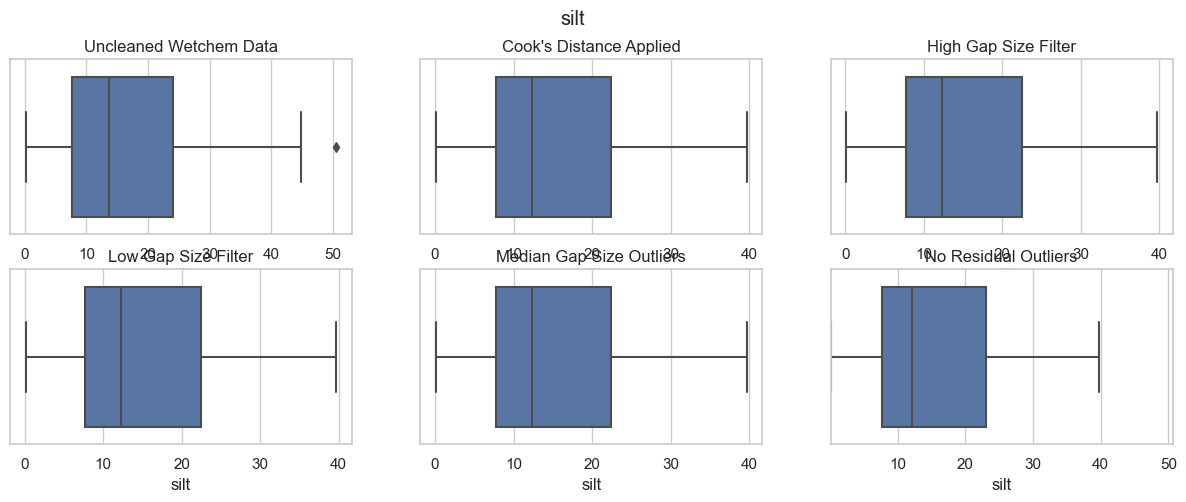

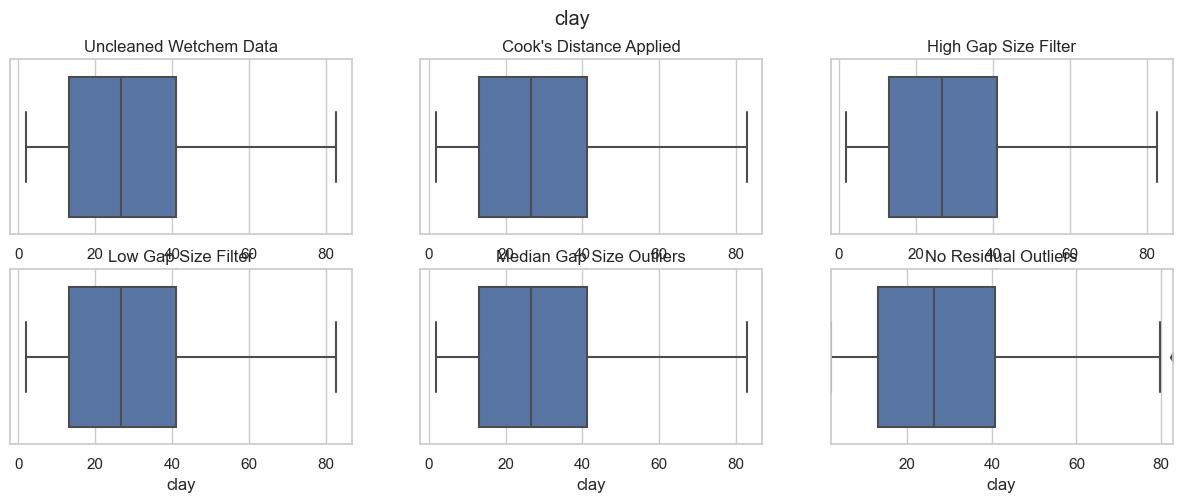

In [73]:
import seaborn as sns
for chemical in chemicals:
    print(chemical)
    sns.set_theme(style="whitegrid")
    if(chemical in wetchem_df.columns):
        print(chemical)
        fig, axes = plt.subplots(2, 3, figsize=(15, 5), sharey=True)
        fig.suptitle(chemical)
        
        lo = uncleaned_wetchem_df[chemical].min()
        hi = uncleaned_wetchem_df[chemical].max()
        print(lo)
        print(hi)

        sns.boxplot(ax=axes[0,0], x=uncleaned_wetchem_df[chemical])
        axes[0,0].set_title("Uncleaned Wetchem Data")

        plt.xlim(lo, hi)
        sns.boxplot(ax=axes[0,1], x=cooks_df_filtered[chemical])
        axes[0,1].set_title("Cook's Distance Applied")

        plt.xlim(lo, hi)
        sns.boxplot(ax=axes[0,2], x=high_val_filtered_df[chemical])
        axes[0,2].set_title("High Gap Size Filter")
        
        plt.xlim(lo, hi)
        sns.boxplot(ax=axes[1,0], x=low_val_filtered_df[chemical])
        axes[1,0].set_title("Low Gap Size Filter")
       
        plt.xlim(lo, hi)
        sns.boxplot(ax=axes[1,1], x=md_val_filtered_df[chemical])
        axes[1,1].set_title("Median Gap Size Outliers")
        
        
        plt.xlim(lo, hi)
        sns.boxplot(ax=axes[1,2], x=no_residual_outliers[chemical])
        axes[1,2].set_title("No Residual Outliers")

        plt.savefig(f"outputFiles/boxplots/{chemical}")

In [74]:
cooks_df_filtered.columns

Index(['aluminium', 'boron', 'calcium', 'clay', 'copper', 'ec_salts',
       'exchangeable_acidity', 'iron', 'magnesium', 'manganese', 'phosphorus',
       'potassium', 'sand', 'silt', 'sodium', 'sulphur', 'zinc', 'ph'],
      dtype='object')

In [75]:
import psycopg2

In [76]:
def get_db_cursor():
    username = "doadmin"
    password = 'yzmodwh2oh16iks6'
    host = 'db-postgresql-cl1-do-user-2276924-0.db.ondigitalocean.com'
    port = 25060
    database = 'MandatoryMetadata'
    schema = 'historical'

    conn = psycopg2.connect(host=host,database=database, user=username, password=password, port=port)
    cur = conn.cursor()
    cur.execute("SET search_path TO " + schema)

    return conn, cur

In [77]:
conn, cur = get_db_cursor()

In [78]:
aver_outliers = pd.read_sql("SELECT metadata_id, non_averaged_spectra FROM spectraldata WHERE (is_finalized=True AND (passed=False AND is_active=False AND averaged=False))", con=conn)

C:\Users\Tsuma Thomas\AppData\Roaming\Python\Python310\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [86]:
aver_outliers.dropna(inplace=True)

In [80]:
metadata = pd.read_sql("select * from mandatorymetadata m",con =conn)

C:\Users\Tsuma Thomas\AppData\Roaming\Python\Python310\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [93]:
aver_outlier_output = pd.merge(aver_outliers, metadata, on="metadata_id", how='left')[['sample_code','non_averaged_spectra']]

In [95]:
aver_outlier_output = aver_outlier_output[~(aver_outlier_output['sample_code'].isin(wetchem_df['sample_code'].values))]

In [96]:
aver_outlier_output.to_csv("outputFiles/outlier_spectra.csv")

In [97]:
aver_outlier_output

,sample_code,non_averaged_spectra
8,CK002SA1662,"{'522': [2.3873906038885924, 2.46606750839654,..."
9,CK002SA1662,"{'522': [2.654514961164192, 2.5214175641109318..."
16,CH006SA6580,"{'522': [2.3156306894416305, 2.273178553852303..."
17,CH006SA6580,"{'522': [2.368974943779629, 2.3769467943058573..."
24,CI014SA7010,"{'522': [2.1459617561069706, 2.21027562315493,..."
...,...,...
13467,CC176SA2142,"{'522': [1.8822115200953549, 1.876675341643357..."
13468,CC176SA2517,"{'522': [2.174878753910197, 2.21841704408042, ..."
13469,CC176SA2517,"{'522': [2.007858151826886, 2.139915300295861,..."
13470,CC176SA2394,"{'522': [2.094633548758498, 2.033454010230025,..."
